In [1]:
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout
from keras import optimizers, regularizers
from datetime import datetime
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from keras import optimizers

random_state = 6
np.random.seed(random_state)

Using TensorFlow backend.


### Define parameters

In [2]:
filename = 'seismogram_data_cents_db.csv'
df = pd.read_csv(filename)
df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,...,1606.000000,1606.000000,1606.000000,1606.0,1606.000000,1606.000000,1.606000e+03,1.606000e+03,1606.000000,1606.000000
mean,451.221669,941.665095,75.003741,9.231527,50.089629,9.011473,33.163889,11.137501,21.313839,13.738046,...,-79.980776,-79.979309,-79.978603,0.0,278.243072,-0.188070,3.743952e+12,5.021586e+17,31.972242,0.323163
std,302.649662,225.061154,37.099307,35.261332,19.673425,23.210687,12.591131,14.331587,7.673028,8.545568,...,0.190952,0.217414,0.185078,0.0,7662.201633,4.893058,2.781032e+13,4.202786e+18,763.247083,0.467830
min,0.000000,487.638894,0.590916,-95.650386,9.991572,-63.162621,5.273298,-38.585637,0.495500,-20.883890,...,-80.000008,-80.000008,-80.000008,0.0,-18424.601562,-148.536407,1.145826e+00,1.647420e+08,-1.557898,0.000000
25%,200.250000,775.150225,46.703585,-14.839313,36.362204,-7.899532,24.523875,2.047651,16.663696,9.773171,...,-80.000000,-80.000000,-80.000000,0.0,-0.564912,-0.066578,1.089125e+05,4.726152e+10,-0.056514,0.000000
50%,401.000000,900.926968,74.069958,12.228716,49.900223,12.684427,31.645115,14.229327,20.592639,15.489321,...,-80.000000,-80.000000,-80.000000,0.0,0.114271,-0.004160,1.769261e+06,7.682032e+11,0.241702,0.000000
75%,684.750000,1095.790912,100.281783,35.329806,63.719153,28.028384,40.849423,22.416433,25.514643,19.247300,...,-80.000000,-80.000000,-80.000000,0.0,2.218386,0.057529,6.593582e+08,8.217131e+14,1.950677,1.000000
max,1086.000000,1572.073401,202.898203,98.485401,123.096246,64.457973,81.809122,47.306912,52.774850,39.409499,...,-73.452782,-72.382477,-74.135483,0.0,300014.312500,11.173301,3.098055e+14,6.909585e+19,27426.243439,1.000000


In [3]:
n_feature = np.shape(df)[1] - 2

X = df.iloc[:,:n_feature]
Y = df.iloc[:,-1]

X, Y = shuffle(X, Y, random_state=random_state)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)

Y_train = to_categorical(Y_train)

mms = StandardScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

input_dim = np.shape(X_train)[1]
output_dim = np.shape(Y_train)[1]

### Model setup

In [33]:
def create_baseline():
    model = Sequential()
    model.add(Dense(16, activation = 'relu', input_dim = input_dim, name='Input_layer'))
#     model.add(Dropout(0.2))
#     model.add(Dense(64, activation = 'relu', name='layer_2'))
#     model.add(Dropout(0.2))
#     model.add(Dense(32, activation = 'relu', name='layer_3'))
#     model.add(Dropout(0.2))
    model.add(Dense(8, activation = 'relu', name='layer_4'))
    model.add(Dense(output_dim, activation="softmax", name='Output_layer'))
    adam = optimizers.Adam(lr= 0.0001)
    model.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])
    return model

In [34]:
model = create_baseline()
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 200, validation_split=0.25, verbose=1)

Train on 843 samples, validate on 281 samples
Epoch 1/200
843/843 [==============================] - 0s - loss: 0.5983 - acc: 0.6607 - val_loss: 0.5525 - val_acc: 0.7189
Epoch 2/200
843/843 [==============================] - 0s - loss: 0.5362 - acc: 0.7082 - val_loss: 0.5348 - val_acc: 0.7295
Epoch 3/200
843/843 [==============================] - 0s - loss: 0.5133 - acc: 0.7438 - val_loss: 0.5103 - val_acc: 0.7331
Epoch 4/200
843/843 [==============================] - 0s - loss: 0.4965 - acc: 0.7592 - val_loss: 0.4936 - val_acc: 0.7331
Epoch 5/200
843/843 [==============================] - 0s - loss: 0.4795 - acc: 0.7794 - val_loss: 0.4833 - val_acc: 0.7331
Epoch 6/200
843/843 [==============================] - 0s - loss: 0.4668 - acc: 0.7758 - val_loss: 0.4834 - val_acc: 0.7544
Epoch 7/200
843/843 [==============================] - 0s - loss: 0.4569 - acc: 0.7865 - val_loss: 0.4616 - val_acc: 0.7544
Epoch 8/200
843/843 [==============================] - ETA: 0s - loss: 0.4442 - acc: 0

843/843 [==============================] - 0s - loss: 0.2216 - acc: 0.9098 - val_loss: 0.3253 - val_acc: 0.8434
Epoch 66/200
843/843 [==============================] - 0s - loss: 0.2117 - acc: 0.9217 - val_loss: 0.3129 - val_acc: 0.8612
Epoch 67/200
843/843 [==============================] - 0s - loss: 0.2056 - acc: 0.9170 - val_loss: 0.3096 - val_acc: 0.8470
Epoch 68/200
843/843 [==============================] - 0s - loss: 0.1980 - acc: 0.9312 - val_loss: 0.3115 - val_acc: 0.8577
Epoch 69/200
843/843 [==============================] - 0s - loss: 0.1970 - acc: 0.9265 - val_loss: 0.3119 - val_acc: 0.8505
Epoch 70/200
843/843 [==============================] - 0s - loss: 0.1922 - acc: 0.9312 - val_loss: 0.3001 - val_acc: 0.8577
Epoch 71/200
843/843 [==============================] - 0s - loss: 0.1905 - acc: 0.9359 - val_loss: 0.3064 - val_acc: 0.8648
Epoch 72/200
843/843 [==============================] - 0s - loss: 0.1868 - acc: 0.9395 - val_loss: 0.3080 - val_acc: 0.8648
Epoch 73/200


843/843 [==============================] - 0s - loss: 0.0959 - acc: 0.9727 - val_loss: 0.3408 - val_acc: 0.8577
Epoch 131/200
843/843 [==============================] - 0s - loss: 0.0950 - acc: 0.9727 - val_loss: 0.2892 - val_acc: 0.8790
Epoch 132/200
843/843 [==============================] - 0s - loss: 0.0954 - acc: 0.9715 - val_loss: 0.2992 - val_acc: 0.8861
Epoch 133/200
843/843 [==============================] - 0s - loss: 0.0914 - acc: 0.9775 - val_loss: 0.2969 - val_acc: 0.8897
Epoch 134/200
843/843 [==============================] - 0s - loss: 0.0970 - acc: 0.9715 - val_loss: 0.3198 - val_acc: 0.8826
Epoch 135/200
843/843 [==============================] - 0s - loss: 0.0907 - acc: 0.9786 - val_loss: 0.2934 - val_acc: 0.8932
Epoch 136/200
843/843 [==============================] - 0s - loss: 0.0854 - acc: 0.9798 - val_loss: 0.3049 - val_acc: 0.8897
Epoch 137/200
843/843 [==============================] - 0s - loss: 0.0879 - acc: 0.9775 - val_loss: 0.3174 - val_acc: 0.8826
Epoch 

843/843 [==============================] - 0s - loss: 0.0440 - acc: 0.9881 - val_loss: 0.3586 - val_acc: 0.8683
Epoch 196/200
843/843 [==============================] - 0s - loss: 0.0446 - acc: 0.9905 - val_loss: 0.3378 - val_acc: 0.8790
Epoch 197/200
843/843 [==============================] - 0s - loss: 0.0468 - acc: 0.9881 - val_loss: 0.3344 - val_acc: 0.8861
Epoch 198/200
843/843 [==============================] - 0s - loss: 0.0444 - acc: 0.9905 - val_loss: 0.3016 - val_acc: 0.8897
Epoch 199/200
843/843 [==============================] - 0s - loss: 0.0442 - acc: 0.9905 - val_loss: 0.3254 - val_acc: 0.8826
Epoch 200/200
843/843 [==============================] - 0s - loss: 0.0511 - acc: 0.9846 - val_loss: 0.3088 - val_acc: 0.8932


In [35]:
pred = model.predict(X_test)
Y_pred = np.argmax(pred, axis = 1)

print('1. The accuracy of the model is {}\n'.format(accuracy_score(Y_test, Y_pred)))
print('2. Classification report \n {} \n'.format(classification_report(Y_test, Y_pred)))
print('3. Confusion matrix \n {} \n'.format(confusion_matrix(Y_pred, Y_test)))
print('4. Roc_Auc score \n {}'.format(roc_auc_score(Y_pred, Y_test)))

1. The accuracy of the model is 0.8713692946058091

2. Classification report 
              precision    recall  f1-score   support

        0.0       0.91      0.91      0.91       331
        1.0       0.79      0.79      0.79       151

avg / total       0.87      0.87      0.87       482
 

3. Confusion matrix 
 [[300  31]
 [ 31 120]] 

4. Roc_Auc score 
 0.8505231988155499


## Plot loss and accuracy 

In [36]:
# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 16
    }

plt.rc('font', **font)
plt.rc('text', usetex=True)

color_map = 'inferno'

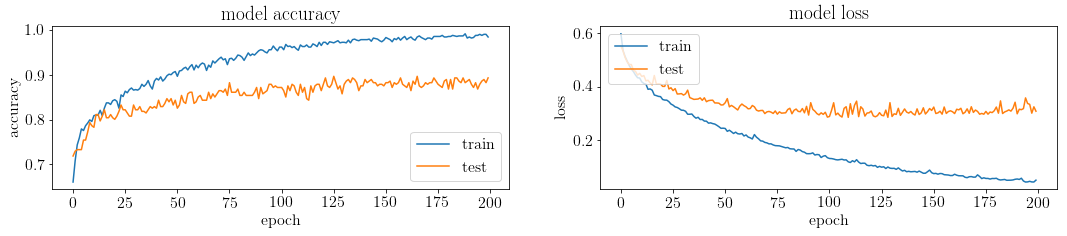

In [37]:
plt.figure(figsize=(18,3))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()